# Testes com busca (euclidean distances) utilizando feature extraction do imagenet

In [1]:
from collections import Counter
import numpy as np
import os
import random
import tensorflow as tf

from sklearn.metrics.pairwise import euclidean_distances
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time


caminho_bases = os.path.join('..', 'bases', 'vazios')
caminho_train = os.path.join(caminho_bases, 'train')
caminho_test = os.path.join(caminho_bases, 'test')

SIZE = (224, 224)

# Recupera imagens

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = datagen.flow_from_directory(
    caminho_train,
    target_size=SIZE,
    batch_size=1024,
    class_mode='binary',
    shuffle=True
)
validation_generator = datagen.flow_from_directory(
    caminho_test,
    target_size=SIZE,
    batch_size=512,
    class_mode='binary',
    shuffle=True
)

Found 20845 images belonging to 2 classes.
Found 2317 images belonging to 2 classes.


# Models

In [3]:
base_model = DenseNet121(weights='imagenet',
                         input_shape=(*SIZE, 3), 
                         include_top=False,
                         pooling='max')

In [4]:
base_model_avg = DenseNet121(weights='imagenet',
                         input_shape=(*SIZE, 3), 
                         include_top=False,
                         pooling='avg')

In [5]:
batch, labels = next(validation_generator)
features_batch = base_model.predict(batch)

In [6]:
ind = random.randint(0, len(features_batch))
distances = euclidean_distances([features_batch[ind]], features_batch)
sequence = np.argsort(distances)[0]
print(ind, sequence)

411 [411 442  20 102  55 209  75 395 252 473 409 203 175 490 494 354 243  74
 362  95  70  57 478 189 340  29 348 104 172 146  45 196  90  62 149 388
 113   8 421 163 177 295 244 360 294 228 169 151  36 327 308 204 306 300
 291 254 121  50 363 286 299 461 161 420 334 154  88  89  97 100 506 324
 475 389 503  24 333 119 122  94   9 202 486 212 257 397 174 343  26 439
 355 368 276 277 258 418 432 408 469 182 250 479  72  86 220 270   1 128
 263 183 436 232 297 120 134 148 170 387 141  96 242 211 265 185 446  79
 287 323  22 226  49 430  38 136 467 400 399 138  18 193 338 353 260 108
 344 194  77  76 292 206  48 468 178 335 249 443 452  59 497 440  47 255
 366 386 143 271 298  10 434 433   2 480 179 118  25  28 372 223  40 359
  92 374 159 296 166 426 236 289 168 267 507 156 412 384 262 314 315 382
 167 158 404 407 322 283 380 219  32 441 499 184 378 273 326 459 304  65
 301 114 505 275 342  78 474  69 416   6 216  43 207 253 413 187  31 403
 336 135 312 451 321 398 449 377 392 234  87 34

In [7]:
print(labels[ind], labels[sequence] )

1.0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0

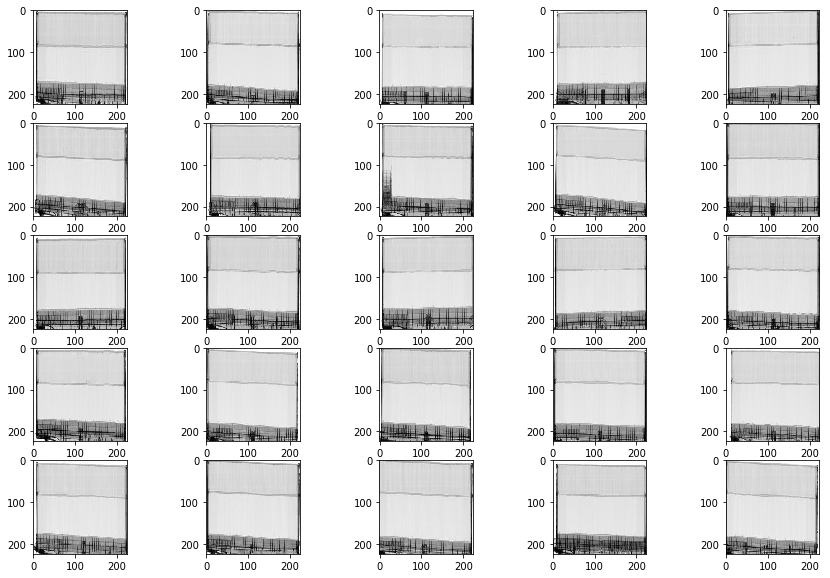

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 5, figsize=(15, 10))
for row in range(5):
    for col in range(5):
        img_ind = row * 5 + col
        axes[col, row].imshow(batch[sequence[img_ind]])


In [9]:
ind = random.randint(0, len(features_batch))
distances = euclidean_distances([features_batch[ind]], features_batch)
sequence = np.argsort(distances)[0]
print(ind, sequence)

14 [ 14 369 415 495 241 347  32 282 222  31 453  16 487 191 132 326 493 346
  81  21 329 458 407 239 106 117 489 424  54 371  80 320 274 221 356 448
   2 118 460 107 361 224 312 210  64 183  38 269 213 482 215 173 285  23
 111 264  46 283   5 463 455 378  12 410 219 492 304 327  71 423  72 129
 116 364 126 438 103 382 101 266 426 314   3 214 445 150 450 238 469 385
  79 419 187 390 142 422 379 437 377 248 454 148 388 192  93  36 335 354
  92 279 334 144  67   7 251 301 367 350 332 105 217 195 231 303 287 178
 258 485 159  15 483 176 439 459 443 494 398 435 254 134  25 359 309 156
  33 260 298 509 158 138 235 185 318  97 372 265 381 147 473 188 414  47
 120 313  60 275  50 315 267 306 511 226  59 278  42 273 271 343 170 403
 292 507 457 486 167 140  77 307 357 348  95 353 291 182 297 124 149 389
 446  24 427 253 479  13  39 232  90 406 436 383 444 333 506 186 252  43
  56 172 349 384 294 139 399 207 165 296 477  88 480 430  94  91  30 360
 411 386  96 345 299 184 237  89 234 451 404 143

In [10]:
print(labels[ind], labels[sequence])

0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1

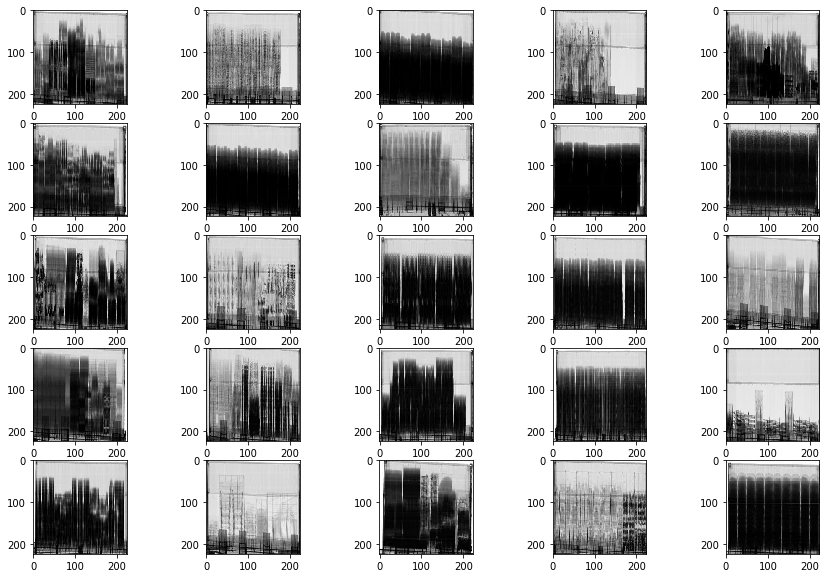

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 5, figsize=(15, 10))
for row in range(5):
    for col in range(5):
        img_ind = row * 5 + col
        axes[col, row].imshow(batch[sequence[img_ind]])


In [12]:
def get_batch(generator, model=base_model):
    batch, labels = next(validation_generator)
    features_batch = model.predict(batch)
    return features_batch, labels
    
def get_sequence(features, ind):
    distances = euclidean_distances([features[ind]], features)
    sequence = np.argsort(distances)[0]
    return sequence


In [19]:
ROUNDS = 200
# Coincidências de classe em 10 itens
train_generator.reset()

total_acertos = 0
tentativas = 0 
for r in range(1, 11):
    X, y = get_batch(train_generator)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:10])
        # print(s, acertos)
        acerto_batch += acertos
        tentativas += 1
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 10)))
    total_acertos += acerto_batch

    
print('Geral: {:0.2f}'.format(total_acertos / (tentativas * 10) ))



Acertos no batch 1: 0.93
Acertos no batch 2: 0.85
Acertos no batch 3: 0.91
Acertos no batch 4: 0.88
Acertos no batch 5: 0.92
Acertos no batch 6: 0.91
Acertos no batch 7: 0.90
Acertos no batch 8: 0.87
Acertos no batch 9: 0.86
Acertos no batch 10: 0.92
Geral: 0.90


In [20]:
total_acertos = 0
tentativas = 0 

validation_generator.reset()
for r in range(1, 11):
    X, y = get_batch(validation_generator)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:10])
        # print(s, acertos)
        acerto_batch += acertos
        tentativas += 1
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 10) ))
    total_acertos += acerto_batch

    
print('Geral: {:0.2f}'.format(total_acertos / (tentativas * 10) ))


Acertos no batch 1: 0.87
Acertos no batch 2: 0.87
Acertos no batch 3: 0.91
Acertos no batch 4: 0.88
Acertos no batch 5: 0.88
Acertos no batch 6: 0.92
Acertos no batch 7: 0.91
Acertos no batch 8: 0.89
Acertos no batch 9: 0.88
Acertos no batch 10: 0.91
Geral: 0.89


In [21]:
# Coincidências de classe em 20 itens

total_acertos = 0
tentativas = 0 

train_generator.reset()
for r in range(1, 11):
    X, y = get_batch(train_generator)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:20])
        # print(s, acertos)
        acerto_batch += acertos
        tentativas += 1
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 20)))
    total_acertos += acerto_batch

    
print('Geral: {:0.2f}'.format(total_acertos / (tentativas * 20) ))


Acertos no batch 1: 0.90
Acertos no batch 2: 0.90
Acertos no batch 3: 0.88
Acertos no batch 4: 0.85
Acertos no batch 5: 0.82
Acertos no batch 6: 0.86
Acertos no batch 7: 0.86
Acertos no batch 8: 0.87
Acertos no batch 9: 0.85
Acertos no batch 10: 0.84
Geral: 0.86


In [16]:
# Coincidências de classe em 20 itens - por classe
train_generator.reset()
acerto_total = Counter()
total = Counter()
for r in range(1, 11):
    X, y = get_batch(train_generator)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:20])
        total[y[ind]] += 20
        acerto_total[y[ind]] += acertos
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 20)))


Acertos no batch 1: 0.87
Acertos no batch 2: 0.87
Acertos no batch 3: 0.87
Acertos no batch 4: 0.82
Acertos no batch 5: 0.82
Acertos no batch 6: 0.86
Acertos no batch 7: 0.86
Acertos no batch 8: 0.86
Acertos no batch 9: 0.87
Acertos no batch 10: 0.83


In [17]:
print('0 = não vazio\n1 = vazio')
for classe in [0, 1]:
    print('Acerto classe {}: {:d} de {:d} ({:0.2f})'.format(
           classe, acerto_total[classe], total[classe],
           (acerto_total[classe] / total[classe]) )
         )


0 = não vazio
1 = vazio
Acerto classe 0: 15549 de 19940 (0.78)
Acerto classe 1: 18617 de 20060 (0.93)


## Repetir teste utilizando modelo AvgPool

In [18]:
# Coincidências de classe em 20 itens - por classe
train_generator.reset()
acerto_total = Counter()
total = Counter()
for r in range(1, 11):
    X, y = get_batch(train_generator, base_model_avg)
    acerto_batch = 0
    for s in range(ROUNDS):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:20])
        total[y[ind]] += 20
        acerto_total[y[ind]] += acertos
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / (ROUNDS * 20)))

print('0 = não vazio\n1 = vazio')
for classe in [0, 1]:
    print('Acerto classe {}: {:d} de {:d} ({:0.2f})'.format(
           classe, acerto_total[classe], total[classe],
           (acerto_total[classe] / total[classe]) )
         )


Acertos no batch 1: 0.85
Acertos no batch 2: 0.87
Acertos no batch 3: 0.90
Acertos no batch 4: 0.89
Acertos no batch 5: 0.85
Acertos no batch 6: 0.90
Acertos no batch 7: 0.88
Acertos no batch 8: 0.88
Acertos no batch 9: 0.90
Acertos no batch 10: 0.85
0 = não vazio
1 = vazio
Acerto classe 0: 16059 de 19700 (0.82)
Acerto classe 1: 19047 de 20300 (0.94)
